Image loaded successfully.


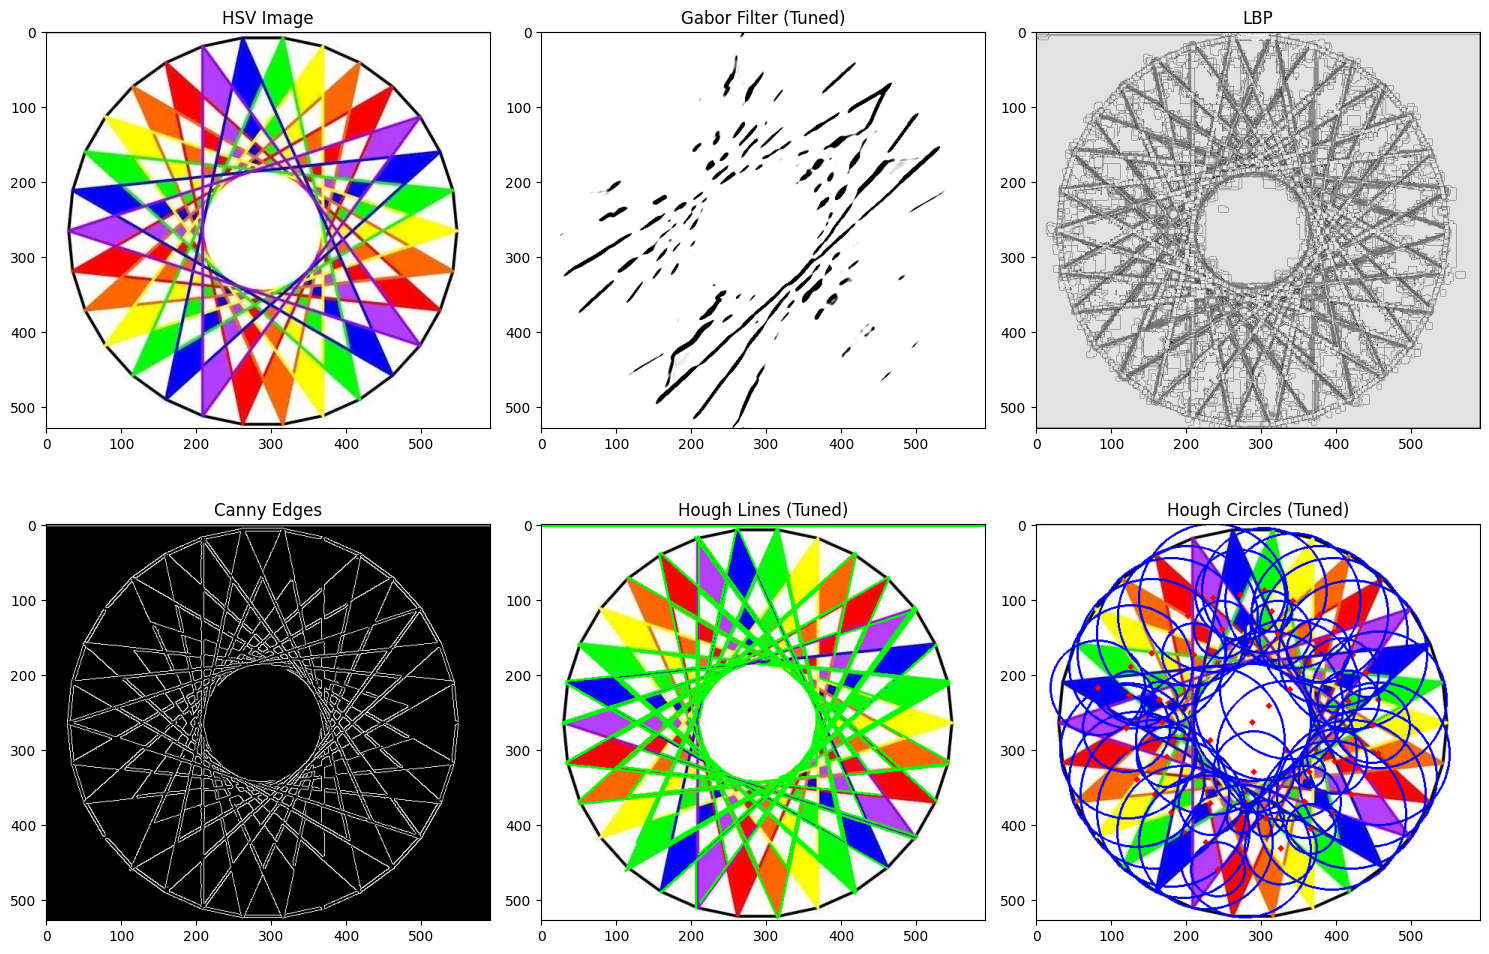

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

# Load image
image = cv2.imread('/content/image.webp')
if image is None:
    print("Error: Image not found.")
else:
    print("Image loaded successfully.")

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Morphological Operations (to reduce noise)
kernel = np.ones((5,5), np.uint8)
morph_image = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Gabor Filter - Tuned Parameters
def apply_gabor(image):
    g_kernel = cv2.getGaborKernel(
        (21, 21),      # Kernel size
        5.0,           # Sigma (smoothness)
        np.pi / 4,     # Theta (orientation)
        10.0,          # Lambda (wavelength)
        0.5,           # Gamma (aspect ratio)
        0,             # Psi (phase offset)
        ktype=cv2.CV_32F
    )
    filtered_img = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    return filtered_img

gabor_image = apply_gabor(morph_image)

# LBP for Texture
def extract_lbp(image):
    lbp = feature.local_binary_pattern(image, 8, 1, method='uniform')
    return lbp

lbp_image = extract_lbp(morph_image)

# Edge Detection using Canny
edges = cv2.Canny(gray, 80, 200)

# Hough Transform - Tuned Line Detection
line_image = image.copy()
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=20, maxLineGap=10)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Transform - Tuned Circle Detection
circle_image = image.copy()
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 30, param1=80, param2=40, minRadius=10, maxRadius=100)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_image, (i[0], i[1]), i[2], (255, 0, 0), 2)
        cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Plot Results
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)), plt.title("HSV Image")
plt.subplot(2, 3, 2), plt.imshow(gabor_image, cmap='gray'), plt.title("Gabor Filter (Tuned)")
plt.subplot(2, 3, 3), plt.imshow(lbp_image, cmap='gray'), plt.title("LBP")
plt.subplot(2, 3, 4), plt.imshow(edges, cmap='gray'), plt.title("Canny Edges")
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)), plt.title("Hough Lines (Tuned)")
plt.subplot(2, 3, 6), plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB)), plt.title("Hough Circles (Tuned)")
plt.tight_layout()
plt.show()

Image loaded successfully.


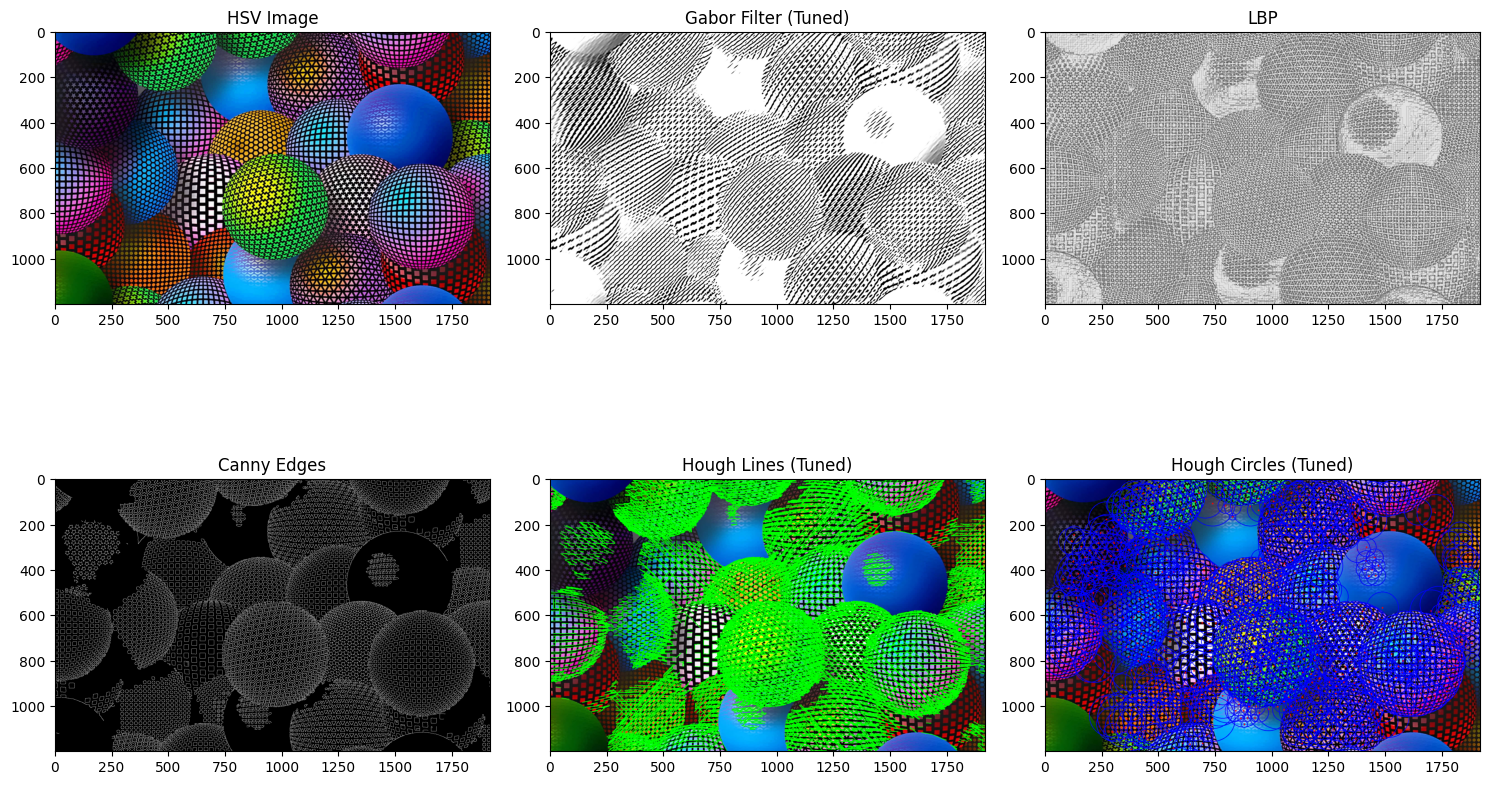

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

# Load image
image = cv2.imread('/content/image2.jpg')
if image is None:
    print("Error: Image not found.")
else:
    print("Image loaded successfully.")

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Morphological Operations (to reduce noise)
kernel = np.ones((5,5), np.uint8)
morph_image = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Gabor Filter - Tuned Parameters
def apply_gabor(image):
    g_kernel = cv2.getGaborKernel(
        (21, 21),      # Kernel size
        5.0,           # Sigma (smoothness)
        np.pi / 4,     # Theta (orientation)
        10.0,          # Lambda (wavelength)
        0.5,           # Gamma (aspect ratio)
        0,             # Psi (phase offset)
        ktype=cv2.CV_32F
    )
    filtered_img = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    return filtered_img

gabor_image = apply_gabor(morph_image)

# LBP for Texture
def extract_lbp(image):
    lbp = feature.local_binary_pattern(image, 8, 1, method='uniform')
    return lbp

lbp_image = extract_lbp(morph_image)

# Edge Detection using Canny
edges = cv2.Canny(gray, 80, 200)

# Hough Transform - Tuned Line Detection
line_image = image.copy()
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=20, maxLineGap=10)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Transform - Tuned Circle Detection
circle_image = image.copy()
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 30, param1=80, param2=40, minRadius=10, maxRadius=100)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_image, (i[0], i[1]), i[2], (255, 0, 0), 2)
        cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)

# Plot Results
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)), plt.title("HSV Image")
plt.subplot(2, 3, 2), plt.imshow(gabor_image, cmap='gray'), plt.title("Gabor Filter (Tuned)")
plt.subplot(2, 3, 3), plt.imshow(lbp_image, cmap='gray'), plt.title("LBP")
plt.subplot(2, 3, 4), plt.imshow(edges, cmap='gray'), plt.title("Canny Edges")
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)), plt.title("Hough Lines (Tuned)")
plt.subplot(2, 3, 6), plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB)), plt.title("Hough Circles (Tuned)")
plt.tight_layout()
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


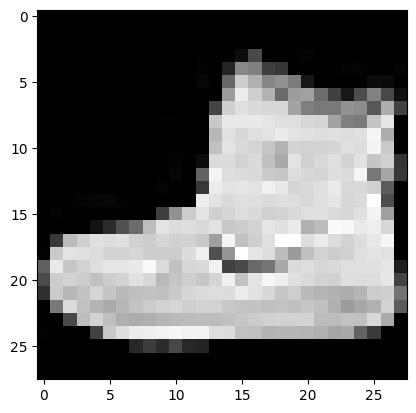

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7715 - loss: 0.6319
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8862 - loss: 0.3089
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9049 - loss: 0.2568
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9170 - loss: 0.2220
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9290 - loss: 0.1938
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9378 - loss: 0.1676
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9448 - loss: 0.1475
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9521 - loss: 0.1300
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9596 - loss: 0.1081
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.0993
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9679 - loss: 0.0858
Epoch 12/50
1875/1875 ━━━━━

In [32]:
from tensorflow.keras.datasets import fashion_mnist, cifar100
import matplotlib.pyplot as plt

# Load Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Load CIFAR-100
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar100.load_data()

# Show some sample images
plt.imshow(X_train[0], cmap="gray")
plt.show()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize and add channel dimension
X_train_norm = X_train[..., None] / 255.0
X_test_norm = X_test[..., None] / 255.0

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train_norm, y_train, epochs=50, batch_size=32)

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predictions for the test set
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9090
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.89      0.86      1000
           3       0.93      0.90      0.92      1000
           4       0.88      0.84      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.76      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix:
[[834   1  31  16   3   1 107   0   7   0]
 [  2 983   0   9   3   0   1   0   2   0]
 [ 11   1 889   4  28   0  63   0   4   0]
 [ 11   9  13